# HW3

Submitted by: Lior Sukman (ID 319124244) Efrat Kohen (ID 300385564) Mandy Rosemblaum (ID 305747230)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from math import sqrt

## Q1

a) Load the time series file "changepoint_ts.csv"

In [82]:
#Build Dataframe
df = pd.read_csv('changepoint_ts.csv') #How to upload data from web urls?
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   x           506 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.0 KB


b) Create the matrix L and calculate L^(-1)

In [83]:
data_points = df.shape[0]

L = np.identity(data_points)
for i in range(1, data_points):
   L[i, i - 1] = -1

L_inv = np.linalg.inv(L)

c) Solve the Lasso model and transform the result using the relation beta = L_inv * u. Find
the best lambda using cross-validation.

In [84]:
alphas = np.logspace(-4, 2, 28)
parameters = {'alpha': alphas}

labels = df['x'].copy()

model = linear_model.Lasso(max_iter = 10_000)
clf = GridSearchCV(model, parameters, cv = 5)
clf.fit(L_inv, labels)

print('best parameter is:') 
print(clf.best_params_)

best parameter is:
{'alpha': 0.000774263682681127}


In [85]:
alpha = clf.best_params_['alpha']
model = linear_model.Lasso(alpha = alpha, max_iter = 10_000)
model.fit(L_inv, labels)

betta = np.dot(L_inv, model.coef_) + model.intercept_

d) Plot the fitted model as in the figure above.

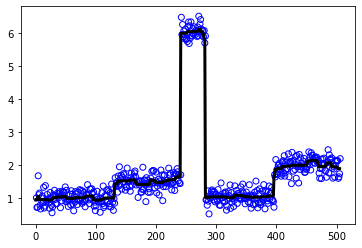

In [86]:
plt.scatter(df.to_numpy()[:,0], labels, facecolors='none', edgecolors='b')
plt.plot(betta, color = 'k', linewidth = 3)
plt.show()

## Q2

In [87]:
#Build Dataframe with the requierd features
csv_url = 'https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/tutorials/data/chicagoCrimes10k.csv'
df=pd.read_csv(csv_url)
data = df[["Arrest", "Date", "Year", "Primary Type", "Location Description", "Domestic", "Beat", "District", "Ward", "Community Area", "FBI Code"]]

(b) Transform the categorical variables to binary variables ("one-hot encoding").

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Arrest                9999 non-null   bool   
 1   Date                  9999 non-null   object 
 2   Year                  9999 non-null   int64  
 3   Primary Type          9999 non-null   object 
 4   Location Description  9993 non-null   object 
 5   Domestic              9999 non-null   bool   
 6   Beat                  9999 non-null   int64  
 7   District              9837 non-null   float64
 8   Ward                  9999 non-null   int64  
 9   Community Area        9999 non-null   int64  
 10  FBI Code              9999 non-null   object 
dtypes: bool(2), float64(1), int64(4), object(4)
memory usage: 722.7+ KB


In [90]:
#Build Dataframes of binary variables and join with data 
categorical_variables = ["Arrest",  'Primary Type', 'Location Description', 'Domestic', 'Beat', 'District', 'Ward', 'FBI Code'] #which features do you think is categorial?
df_list = []
for categoria in categorical_variables:
    df = pd.get_dummies(data[categoria], prefix=categoria, drop_first=True)
    data = pd.concat([data, df] ,axis=1)
    data = data.drop(columns=[categoria])
data

,Date,Year,Community Area,Arrest_True,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CONCEALED CARRY LICENSE VIOLATION,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,...,FBI Code_14,FBI Code_15,FBI Code_16,FBI Code_17,FBI Code_18,FBI Code_19,FBI Code_20,FBI Code_22,FBI Code_24,FBI Code_26
0,02/08/2015 11:43:40 PM,2015,46,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,02/08/2015 11:41:42 PM,2015,53,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,02/08/2015 11:30:22 PM,2015,25,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,02/08/2015 11:30:23 PM,2015,42,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,02/08/2015 11:30:58 PM,2015,25,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,01/23/2015 08:40:40 AM,2015,70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,01/23/2015 08:39:31 AM,2015,42,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,01/23/2015 08:30:35 AM,2015,46,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,01/23/2015 08:30:30 AM,2015,44,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 488 entries, Date to FBI Code_26
dtypes: int64(2), object(1), uint8(485)
memory usage: 4.9+ MB


(c) Transform the date to day in week, hour in day, month in year

In [92]:
#Don't you think these categoreis should be "one-hot encoding" as well?
data.insert(1, 'Date_object', pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p'))
data.insert(1, 'Hour', pd.DatetimeIndex(data['Date_object']).hour)
data.insert(2, 'week_day', data['Date_object'].dt.dayofweek)
data.insert(3, 'Month', pd.DatetimeIndex(data['Date_object']).month)
data = data.drop(columns=['Date', 'Date_object'])

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 490 entries, Hour to FBI Code_26
dtypes: int64(5), uint8(485)
memory usage: 5.0 MB


(a) Split to training set and test set (80%-20%)

In [95]:
def split_df (target_name: str, data: pd.DataFrame):
    """ 
    Split df into random train and test subsets based on target name column

    Parameters
    ----------
    target_name : str
        target column name
    data : DataFrame
        DataFrame  

    return
    ----------
    X_train, X_test, y_train, y_test
    """
    X = data.drop(columns=[target_name])
    y = data[target_name].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [96]:
target_name = "Arrest"
X_train, X_test, y_train, y_test = split_df(target_name, data)

KeyError: "['Arrest'] not found in axis"

(d) Train a Random Forest model (tune the parameter "max_features" using Out of Bag error)

In [64]:
random_forest = RandomForestClassifier(random_state=0, oob_score=True) #is this what they mean by tuning max_features using oob?
_ = random_forest.fit(X_train, y_train)


ValueError: could not convert string to float: 'BURGLARY'

In [ ]:
y_predicted = random_forest.predict(X_test)


(e) Plot the variable importance

(f) Calculate the AUC on the test set.